# Data Exploration

In [31]:
import pickle
import numpy as np
import colorcet as cc
import matplotlib.pyplot as plt
from scipy.spatial import distance
import colormap as cmaps
import matplotlib.font_manager as fm

In [2]:
#raw data
with open('/home/balla/yeoncham/data/nkis.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
#learned doc2vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
model = Doc2Vec.load('/home/balla/yeoncham/data/test') 

In [9]:
emb_vectors = np.array([model.docvecs[i] for i in range(model.docvecs.count)])
print("The number of documents is ",len(emb_vectors))
print("The dimension of embedded vectors is", len(emb_vectors[0]))

The number of documents is  21397
The dimension of embedded vectors is 200


## set institute name

In [5]:
#Korean - English Institute set
subject_list={'KDI국제정책대학원': 'KDIschool',
 '건축도시공간연구소': 'AURI',
 '경제·인문사회연구회': 'NRC',
 '과학기술정책연구원': 'STEPI',
 '국토연구원': 'KRIHS',
 '대외경제정책연구원': 'KIEP',
 '산업연구원': 'KIET',
 '에너지경제연구원': 'KEEI',
 '육아정책연구소': 'KICCE',
 '정보통신정책연구원': 'KISDI',
 '통일연구원': 'KINU',
 '한국개발연구원': 'KDI',
 '한국교육개발원': 'KEDI',
 '한국교육과정평가원': 'KICE',
 '한국교통연구원': 'KOTI',
 '한국노동연구원': 'KLI',
 '한국농촌경제연구원': 'KREI',
 '한국법제연구원': 'KLRI',
 '한국보건사회연구원': 'KIHASA',
 '한국여성정책연구원': 'KWDI',
 '한국조세재정연구원': 'KIPF',
 '한국직업능력개발원': 'KRIVET',
 '한국청소년정책연구원': 'NYPI',
 '한국해양수산개발원': 'KMI',
 '한국행정연구원': 'KIPA',
 '한국형사정책연구원': 'KIC',
 '한국환경정책·평가연구원': 'KEI'}

In [11]:
#classified with related subject
unique_affiliation_classified =['한국형사정책연구원','한국법제연구원','KDI국제정책대학원','대외경제정책연구원', '통일연구원','건축도시공간연구소', '한국교통연구원',  '국토연구원', '에너지경제연구원','한국해양수산개발원', '한국농촌경제연구원','한국환경정책·평가연구원','과학기술정책연구원', '정보통신정책연구원','산업연구원','한국개발연구원', '한국조세재정연구원','한국노동연구원','한국직업능력개발원', '한국교육개발원','한국교육과정평가원','한국청소년정책연구원', '육아정책연구소', '한국여성정책연구원', '한국보건사회연구원','경제·인문사회연구회', '한국행정연구원']

#classification by NRC classification
unique_affiliation_classified2 =['한국형사정책연구원',
'한국법제연구원',
'한국행정연구원',
'통일연구원',
       
 '한국개발연구원',
'KDI국제정책대학원',
'한국조세재정연구원',
'대외경제정책연구원',
'산업연구원',#8

 
'한국교통연구원', 
'건축도시공간연구소', 
 '국토연구원',
'한국농촌경제연구원',
'한국해양수산개발원', 
'한국환경정책·평가연구원',
 '에너지경제연구원',

                                 
#16
 '정보통신정책연구원',
'한국직업능력개발원',
'과학기술정책연구원',
'한국교육개발원',
'한국교육과정평가원',
#21
'한국여성정책연구원',                                 
'한국청소년정책연구원',
'한국보건사회연구원',
 '육아정책연구소', 
'한국노동연구원',


'경제·인문사회연구회', 
]

In [12]:
# index number of each research institute
index_by_affiliation = {}
for affiliation in unique_affiliation_classified:
    index_by_affiliation[affiliation] = np.where(np.array(list(data['등록기관'])) == affiliation)

In [13]:
year=[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
list_by_year=[]
for i, name in enumerate(unique_affiliation_classified):#각 기관마다
    index_list = index_by_affiliation[name][0]

    list_paper_by_year=[]
    for y in year:
        list_paper_year_inst=[]#y 년도에 쓴 논문
        for k in index_list:
            if data.loc[k]['출판년도'] == y:
                list_paper_year_inst.append(k)
        list_paper_by_year.append(list_paper_year_inst)
    list_by_year.append(list_paper_by_year)
print(len(list_by_year))
print(len(list_by_year[0])) # first aff
print(len(list_by_year[0][0])) #1번째 기관, 첫해 논문 리스트

27
19
28


In [18]:
#mean vector of papers pulished in every year
mean_per_year_inst = {}

for i, name in enumerate(unique_affiliation_classified):
    
    mean_inst=[]
    
    for k in range(len(year)):
        # stop if the institution didn't make any report
        if not list_by_year[i][k]:
            mean_inst=[]
            break 
            
        vecs = np.array(emb_vectors[list_by_year[i][k]])
        mean_cordinate = np.mean(vecs,axis=0)
        mean_inst.append(mean_cordinate)


    mean_per_year_inst.update({subject_list[name]:mean_inst})


In [24]:
mean_per_year_inst.keys()

dict_keys(['KIC', 'KLRI', 'KDIschool', 'KIEP', 'KINU', 'AURI', 'KOTI', 'KRIHS', 'KEEI', 'KMI', 'KREI', 'KEI', 'STEPI', 'KISDI', 'KIET', 'KDI', 'KIPF', 'KLI', 'KRIVET', 'KEDI', 'KICE', 'NYPI', 'KICCE', 'KWDI', 'KIHASA', 'NRC', 'KIPA'])

In [27]:
mean_vel_list=[]
for name in mean_per_year_inst.keys():
    if not mean_per_year_inst[name] == []: 
        delta_list_inst=distance.cosine(mean_per_year_inst[name][18], mean_per_year_inst[name][0])
        mean_vel_list.append((name,delta_list_inst))

print((mean_vel_list))

[('KIC', 0.12293922901153564), ('KLRI', 0.11108309030532837), ('KIEP', 0.16795295476913452), ('KINU', 0.0885845422744751), ('KOTI', 0.09021484851837158), ('KRIHS', 0.12198549509048462), ('KEEI', 0.17003053426742554), ('KMI', 0.14475756883621216), ('KREI', 0.10944867134094238), ('KEI', 0.15660494565963745), ('STEPI', 0.1448441743850708), ('KISDI', 0.2995995879173279), ('KIET', 0.10923343896865845), ('KDI', 0.395732045173645), ('KIPF', 0.11499232053756714), ('KLI', 0.14804208278656006), ('KRIVET', 0.1576102375984192), ('KEDI', 0.21793973445892334), ('KICE', 0.059961557388305664), ('NYPI', 0.16647446155548096), ('KWDI', 0.29814696311950684), ('KIHASA', 0.16904032230377197)]


In [28]:
mean_vel_list.sort(key=lambda x: x[1],reverse=False)



['KICE', 'KINU', 'KOTI', 'KIET', 'KREI', 'KLRI', 'KIPF', 'KRIHS', 'KIC', 'KMI', 'STEPI', 'KLI', 'KEI', 'KRIVET', 'NYPI', 'KIEP', 'KIHASA', 'KEEI', 'KEDI', 'KWDI', 'KISDI', 'KDI']
[0.059961557388305664, 0.0885845422744751, 0.09021484851837158, 0.10923343896865845, 0.10944867134094238, 0.11108309030532837, 0.11499232053756714, 0.12198549509048462, 0.12293922901153564, 0.14475756883621216, 0.1448441743850708, 0.14804208278656006, 0.15660494565963745, 0.1576102375984192, 0.16647446155548096, 0.16795295476913452, 0.16904032230377197, 0.17003053426742554, 0.21793973445892334, 0.29814696311950684, 0.2995995879173279, 0.395732045173645]


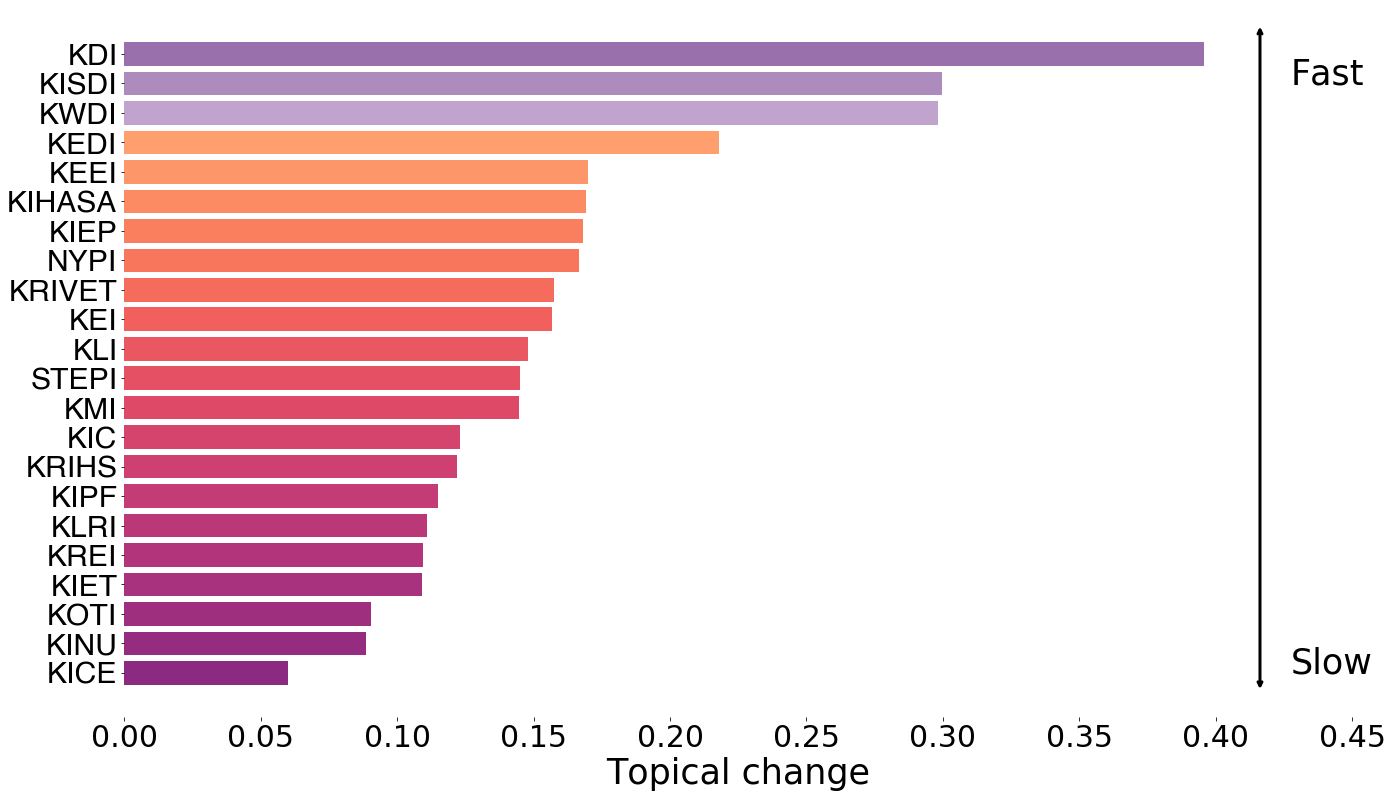

In [32]:


fontprop=fm.FontProperties(fname="/home/balla/yeoncham/data/Helvetica 400.ttf",size=19)
plt.rcParams["figure.figsize"] = (22,13)

c_lst=[plt.cm.magma(a) for a in np.linspace(0.4, 0.8, len(mean_vel_list)-3)]
# c_lst+=[plt.cm.BrBG(0)]
# c_lst+=['#1D3664']
# c_lst+=['#A5401C']
c_lst+=[plt.cm.PRGn(a) for a in np.linspace(0.3, 0.2, 3)]

names = [x[0] for x in mean_vel_list]
print(names)
xs = [x[1] for x in mean_vel_list]
print(xs)

plt.barh(range(len(xs)), xs, color=c_lst)
plt.xlim([0, 0.45])
plt.xlabel('Topical change', fontsize=35)
plt.yticks(range(len(xs)), names,fontsize=30)
from matplotlib.pyplot import gca
ax = gca()
ax.set_yticks(range(len(xs)))

ax.set_yticklabels(names, fontproperties=fontprop,fontsize=30)
plt.annotate(s='', xy=(0.41625,-0.62), xytext=(0.41625,22), arrowprops=dict(arrowstyle='<->', lw='3'))
plt.text(0.4275,20,'Fast', fontsize=35)
plt.text(0.4275,0,'Slow', fontsize=35)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(30)
plt.savefig('Difference_COM.pdf')
plt.show()

